In [17]:
directory = r"Z:\QSimMeasurements\Measurements\\8QV1_Triangle_Lattice\\qubit_parameters\\Dictionary_File\\"

In [19]:
from Import_Functions_Transmon import *
import matplotlib.pyplot as plt

In [31]:
import os
import pickle

files = os.listdir(directory)
sorted_files = sorted(files)
file_name = sorted_files[-1]  # most recent
print(sorted_files)
dictionary_everything = read_info(directory + file_name)

['20250615_222820_8Q_Parameters.pkl', '20250615_223056_8Q_Parameters.pkl', '20250615_223355_8Q_Parameters.pkl', '20250615_224022_8Q_Parameters.pkl', '20250618_155340_8Q_Parameters.pkl', '20250618_155819_8Q_Parameters.pkl', '20250618_160739_8Q_Parameters.pkl', '20250618_161154_8Q_Parameters.pkl', '20250618_161530_8Q_Parameters.pkl', '20250618_161813_8Q_Parameters.pkl', '20250618_162313_8Q_Parameters.pkl', '20250623_103107_8Q_Parameters.pkl', '20250707_091839_8Q_Parameters.pkl', '20250708_092050_8Q_Parameters.pkl', '20250709_081618_8Q_Parameters.pkl']


In [14]:
dictionary_everything

{'Q1': array([0.08774992, 4.44294982, 2.31088279, 0.04348395, 0.64285525]),
 'Q2': array([ 0.06522968,  4.41653009,  2.47157458,  0.00853351, -0.63513068]),
 'Q3': array([0.04490064, 4.36638646, 2.33412906, 0.        , 0.62896545]),
 'Q4': array([0.07077662, 4.5248054 , 2.5653183 , 0.1       , 0.63417076]),
 'Q5': array([0.03938833, 4.47996591, 2.30936685, 0.1       , 0.64701083]),
 'Q6': array([0.06293122, 4.46724348, 2.54000876, 0.1       , 0.65220108]),
 'Q7': array([-0.00852437,  4.35314014,  2.34998833,  0.0378556 ,  0.63905277]),
 'Q8': array([0.03661994, 4.40577597, 2.46466838, 0.        , 0.63326908]),
 'C1': [-0.0148026, 6, 3.05442, 0.2, 0.1],
 'C2': [-0.010529, 6, 3.085389, 0.2, 0.1],
 'C3': [-0.0496748, 6, 2.973237, 0.2, 0.1],
 'C4': [-0.0830829, 6, 3.2742, 0.2, 0.1],
 'C5': [-0.07251603, 6, 2.929635, 0.2, 0.1],
 'C6': [0.03769306, 6, 2.969624, 0.2, 0.1],
 'crosstalk_matrix': array([[ 0.43273506, -0.00522856,  0.01244152, -0.0132376 ,  0.01693609,
         -0.01116467,  0.01

In [33]:
# for Q in All_transmons:
#     dictionary_everything[Q.name] = Q.transmon_popt

dictionary_everything['crosstalk_matrix'] = crosstalk_matrix
dictionary_everything['crosstalk_offset'] = crosstalk_offset
dictionary_everything['crosstalk_inverse'] = crosstalk_inverse

In [34]:
print(directory + file_name)
total_path = directory + file_name_('8Q_Parameters')

print('New File!!!!')
print(total_path)
save_info(dictionary_everything, total_path)

Z:\QSimMeasurements\Measurements\\8QV1_Triangle_Lattice\\qubit_parameters\\Dictionary_File\\20250709_081618_8Q_Parameters.pkl
New File!!!!
Z:\QSimMeasurements\Measurements\\8QV1_Triangle_Lattice\\qubit_parameters\\Dictionary_File\\20250709_090332_8Q_Parameters.pkl


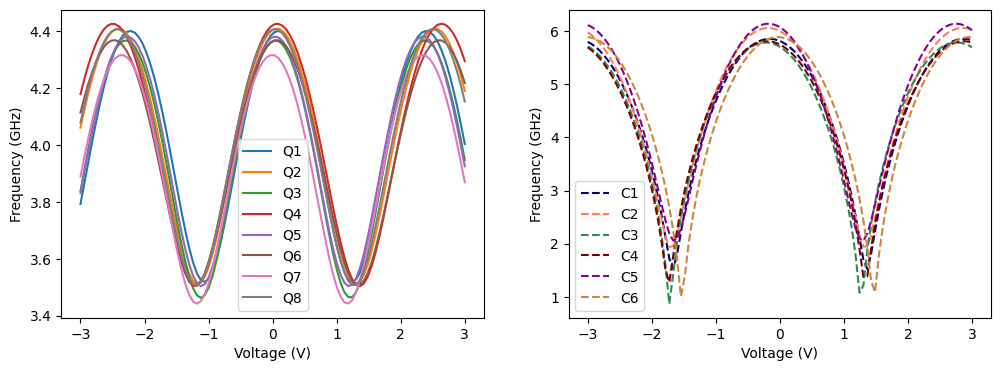

In [6]:
qubit_params_dir = r'Z:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\qubit_parameters'
Q1 = Transmon(np.load(fr'{qubit_params_dir}\Q1_popt.npy'), 'Q1')
Q2 = Transmon(np.load(fr'{qubit_params_dir}\Q2_popt.npy'), 'Q2')
Q3 = Transmon(np.load(fr'{qubit_params_dir}\Q3_popt.npy'), 'Q3')
Q4 = Transmon(np.load(fr'{qubit_params_dir}\Q4_popt.npy'), 'Q4')
Q5 = Transmon(np.load(fr'{qubit_params_dir}\Q5_popt.npy'), 'Q5')
Q6 = Transmon(np.load(fr'{qubit_params_dir}\Q6_popt.npy'), 'Q6')
Q7 = Transmon(np.load(fr'{qubit_params_dir}\Q7_popt.npy'), 'Q7')
Q8 = Transmon(np.load(fr'{qubit_params_dir}\Q8_popt.npy'), 'Q8')

C1 = Transmon(np.load(fr'{qubit_params_dir}\C1_popt.npy'), 'C1')
C2 = Transmon(np.load(fr'{qubit_params_dir}\C2_popt.npy'), 'C2')
C3 = Transmon(np.load(fr'{qubit_params_dir}\C3_popt.npy'), 'C3')
C4 = Transmon(np.load(fr'{qubit_params_dir}\C4_popt.npy'), 'C4')
C5 = Transmon(np.load(fr'{qubit_params_dir}\C5_popt.npy'), 'C5')
C6 = Transmon(np.load(fr'{qubit_params_dir}\C6_popt.npy'), 'C6')

All_qubits = [Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8]
All_couplers = [C1, C2, C3, C4, C5, C6]
All_transmons = All_qubits + All_couplers

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

Vs = np.linspace(-3, 3, 100)
for Q in All_qubits:
    ax1.plot(Vs, transmon_fit(Vs, *Q.transmon_popt), label=Q.name)
ax1.set_xlabel("Voltage (V)")
ax1.set_ylabel("Frequency (GHz)")
ax1.legend()

for Q, color in zip(All_couplers, ['navy', 'coral', 'seagreen', 'maroon', 'darkmagenta', 'peru']):
    ax2.plot(Vs, transmon_fit(Vs, *Q.transmon_popt), label=Q.name, ls='--', color=color)
ax2.set_xlabel("Voltage (V)")
ax2.set_ylabel("Frequency (GHz)")
ax2.legend()

plt.show()

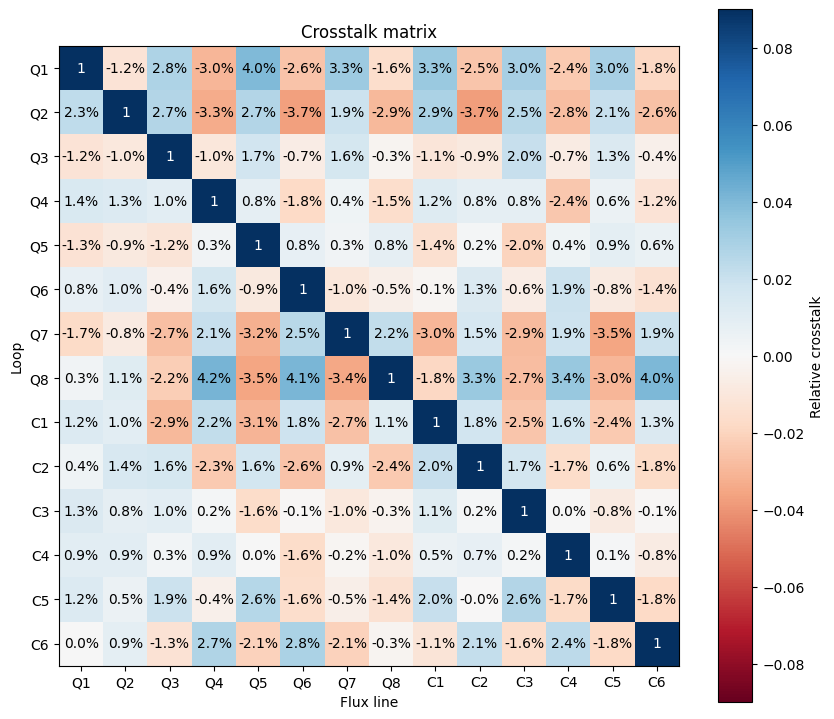

In [32]:
iteration = 5
crosstalk_directory= r'Z:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\crosstalk'
crosstalk_matrix = np.genfromtxt(fr'{crosstalk_directory}\crosstalk_matrix_{iteration}.csv', delimiter=',')
crosstalk_offset = np.genfromtxt(fr'{crosstalk_directory}\offsets_{iteration}.csv', delimiter=',')
try:
    crosstalk_inverse = np.genfromtxt(fr'{crosstalk_directory}\inverse_matrix{iteration}.csv', delimiter=',')
except FileNotFoundError:
    crosstalk_inverse = np.linalg.inv(crosstalk_matrix)


def flux_to_voltage(flux_vector):
    return crosstalk_inverse @ (flux_vector + crosstalk_offset * np.diag(crosstalk_matrix) )
    
def voltage_to_flux(voltage_vector):
    return crosstalk_matrix @ voltage_vector - crosstalk_offset * np.diag(crosstalk_matrix)

def show_percent_matrix(ct_mat):
    percent_matrix = ct_mat.copy()
    for i, Q in enumerate(All_transmons):
        percent_matrix[i] = percent_matrix[i] * Q.flux_quantum_voltage
    
    fig, ax = plt.subplots(figsize=(10,9))
    im= ax.imshow(percent_matrix, cmap='RdBu', vmin=-0.09, vmax=0.09)
    fig.colorbar(im, label=r"Relative crosstalk", ax=ax)
    for (j,i),label in np.ndenumerate(percent_matrix):
        plt.text(i,j,f"{np.round(label*100,1)}%" if i != j else 1,ha='center',va='center', color='black' if i!=j else 'white')
    plt.xticks(range(len(All_transmons)), [Q.name for Q in All_transmons])
    plt.yticks(range(len(All_transmons)), [Q.name for Q in All_transmons])
    plt.ylabel("Loop")
    plt.xlabel("Flux line")
    plt.title("Crosstalk matrix")
    plt.show()

show_percent_matrix(crosstalk_matrix)

In [35]:
class Resonator():
    def __init__(self, coupled_Qubit, popt):
        self.coupled_Q = coupled_Qubit
        self.β, self.Ω = popt            

    def freq(self, flux):
        '''Qubit flux to Resonator frequency'''
        qubit_freq = self.coupled_Q.freq(flux)
        resonator_freq = self.Ω
        g = self.β * np.sqrt(qubit_freq * resonator_freq)
        Δ = qubit_freq - resonator_freq
        return resonator_freq - g**2 / Δ

qubit_params_dir = r'Z:\QSimMeasurements\Measurements\8QV1_Triangle_Lattice\qubit_parameters'
R1 = Resonator(Q1, np.load(fr'{qubit_params_dir}\R1_popt.npy'))
R2 = Resonator(Q2, np.load(fr'{qubit_params_dir}\R2_popt.npy'))
R3 = Resonator(Q3, np.load(fr'{qubit_params_dir}\R3_popt.npy'))
R4 = Resonator(Q4, np.load(fr'{qubit_params_dir}\R4_popt.npy'))
R5 = Resonator(Q5, np.load(fr'{qubit_params_dir}\R5_popt.npy'))
R6 = Resonator(Q6, np.load(fr'{qubit_params_dir}\R6_popt.npy'))
R7 = Resonator(Q7, np.load(fr'{qubit_params_dir}\R7_popt.npy'))
R8 = Resonator(Q8, np.load(fr'{qubit_params_dir}\R8_popt.npy'))

All_resonators = [R1, R2, R3, R4, R5, R6, R7, R8]

def voltages_to_resonators(voltages):
    fluxes = voltage_to_flux(voltages)
    return [R.freq(flux) for R, flux in zip(All_resonators, fluxes)]

voltages_to_resonators([np.float32(-1.051), np.float64(-0.8461), np.float64(-0.6212), np.float64(-0.5251), np.float64(-1.1352), np.float64(-1.1923), np.float64(-1.1785), np.float64(-1.1936), np.float64(-0.1852), np.float64(-0.2132), np.float64(-0.2413), np.float64(-0.2256), np.float64(-0.2009), np.float64(-0.0939)]
)

[np.float64(7.122008254918465),
 np.float64(7.077329047760153),
 np.float64(7.511069973829845),
 np.float64(7.568606145283701),
 np.float64(7.3628148614916284),
 np.float64(7.440745559370861),
 np.float64(7.2536650593064325),
 np.float64(7.308817859619348)]